In [40]:
!pip install koreanize-matplotlib
!apt-get -qq install fonts-nanum

In [41]:
import pandas as pd

# CSV 파일 경로
file_path = "/content/final.csv"

# 데이터 불러오기
df = pd.read_csv(file_path, parse_dates=["DATE"])

df.columns.to_list()

['DATE',
 'GDP(십억원)',
 'GNI(십억원)',
 'GDP_GROWTH(%)',
 'KOSPI',
 '국고채(3년)(%)',
 '국고채(10년)(%)',
 '뉴스심리지수',
 '경제심리지수',
 '수출금액지수',
 '수입금액지수',
 '수출물가지수(원화기준)',
 '수출물가지수(계약통화기준)',
 '수출물가지수(달러기준)',
 '수입물가지수(원화기준)',
 '수입물가지수(계약통화기준)',
 '수입물가지수(달러기준)',
 '대외채권',
 '대외채무',
 '순대외채권',
 '외환보유액(천달러)',
 '기준금리',
 'CD(91일)',
 '무담보콜금리(1일, 전체거래)',
 '경상수지(계절조정)',
 'CPI',
 'PPI',
 '원/미국달러(매매기준율)',
 '일본엔/달러',
 '달러/유로',
 '미국기준금리',
 'NASDAQ',
 '위안화/달러',
 '미국CPI',
 '미국PPI',
 '본원 통화(달러 발행량)',
 '미국 소비자심리지수',
 '금',
 '은',
 '원유',
 '한국실업률',
 '미국실업률']

In [42]:
# 각 컬럼별 결측치 개수 확인
missing_counts = df.isnull().sum()

# 결측치가 있는 컬럼만 출력
missing_counts = missing_counts[missing_counts > 0]

# 결과 출력
print("📌 결측치가 있는 컬럼과 개수:")
print(missing_counts)

📌 결측치가 있는 컬럼과 개수:
GDP_GROWTH(%)          91
KOSPI               12786
국고채(3년)(%)          14196
국고채(10년)(%)         14962
뉴스심리지수              16437
경제심리지수              15706
수출금액지수              10227
수입금액지수              10227
수출물가지수(원화기준)         4018
수출물가지수(계약통화기준)       4018
수출물가지수(달러기준)         4018
수입물가지수(원화기준)         4018
수입물가지수(계약통화기준)       4018
수입물가지수(달러기준)         4018
대외채권                12692
대외채무                12692
순대외채권               12692
외환보유액(천달러)           4018
기준금리                14370
CD(91일)             12786
무담보콜금리(1일, 전체거래)    12786
경상수지(계절조정)          12786
CPI                  1827
PPI                  1827
원/미국달러(매매기준율)        1585
일본엔/달러               6300
달러/유로               12519
미국기준금리               8305
NASDAQ              12786
위안화/달러              14845
미국CPI                8401
미국PPI                8401
미국 소비자심리지수           8401
금                   14852
은                   14852
원유                  14845
한국실업률               10958
미국실업률               

가설 1) 미국의 금리가 상승하면 환율이 올라간다?

미국 금리는 글로벌 금융시장에 큰 영향을 미치며, 특히 신흥국 환율에 직접적인 영향을 준다고 알려져 있음. 이에 따라, “미국의 기준금리가 상승하면 원화의 가치가 하락하고 환율은 상승할 것”이라는 가설을 세움

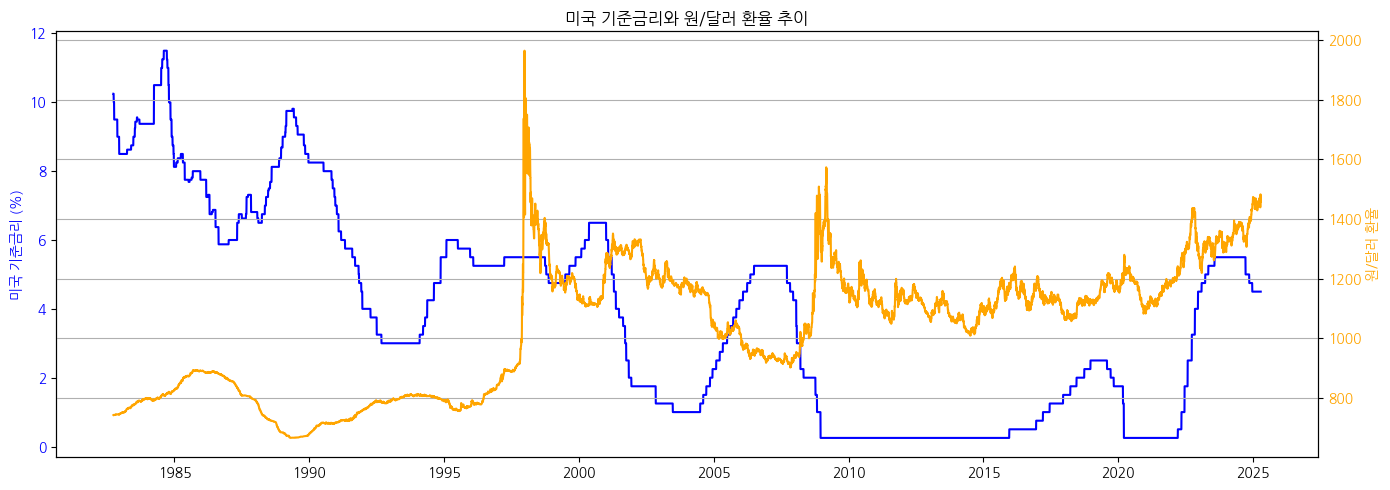

In [43]:
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

cols = ['DATE', '미국기준금리', '원/미국달러(매매기준율)']
df_sub = df[cols].dropna()

fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 Y축: 미국 기준금리
ax1.plot(df_sub['DATE'], df_sub['미국기준금리'], color='blue', label='미국 기준금리')
ax1.set_ylabel('미국 기준금리 (%)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 오른쪽 Y축: 원/달러 환율
ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='orange', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('미국 기준금리와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

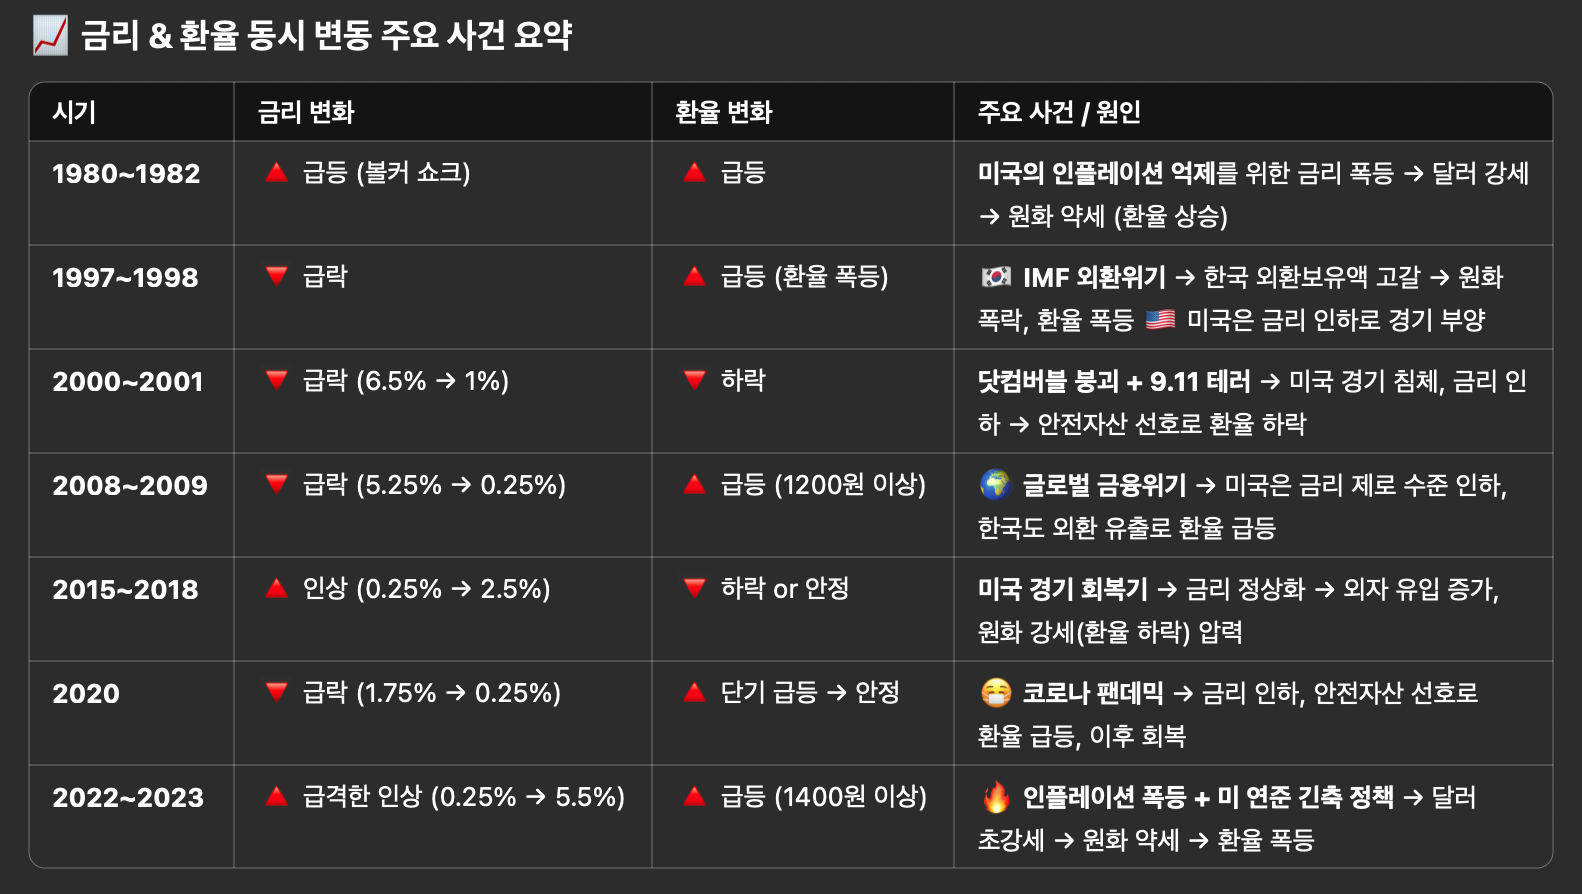



---


추론통계

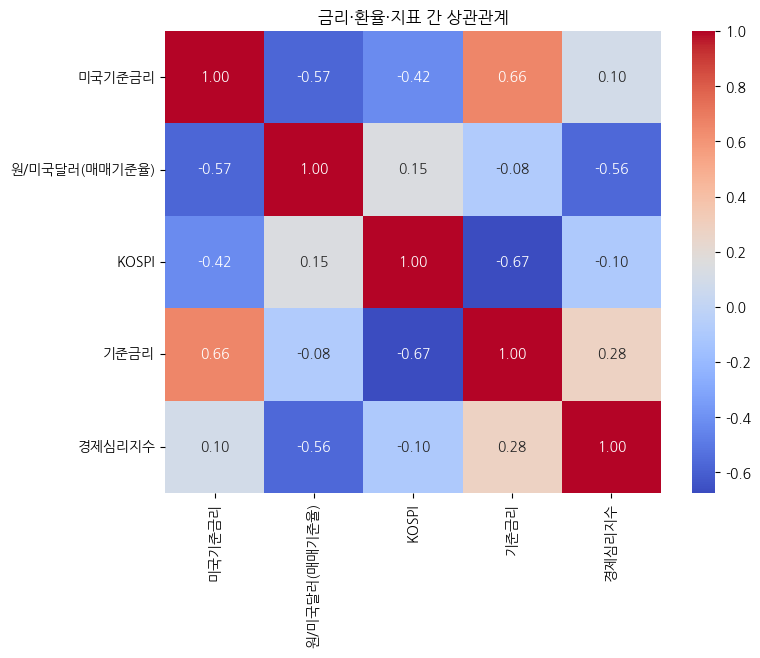

In [44]:
import koreanize_matplotlib

cols = ['미국기준금리', '원/미국달러(매매기준율)', 'KOSPI', '기준금리', '경제심리지수']
corr_matrix = df[cols].corr()

plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("금리·환율·지표 간 상관관계")
plt.show()

경제심리지수,미국기준금리 => 가장 영향력이 큰 변수

In [45]:
#선형회귀분석
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 컬럼만 선택
df_sub = df[['미국기준금리', '원/미국달러(매매기준율)']].dropna()

# X: 미국기준금리, y: 환율
X = sm.add_constant(df_sub['미국기준금리'])  # 절편 추가
y = df_sub['원/미국달러(매매기준율)']

# 선형 회귀 분석
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.329
Model:                            OLS   Adj. R-squared:                  0.329
Method:                 Least Squares   F-statistic:                     7622.
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:23:37   Log-Likelihood:            -1.0213e+05
No. Observations:               15540   AIC:                         2.043e+05
Df Residuals:                   15538   BIC:                         2.043e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1188.9357      2.268    524.122      0.0

- 기울기: -41.07 => 금리가 1% 올라가면, 환율은 41.07 하락한다.
- 절편: 1188.94 => 미국 금리가 0일 때의 평균 환율 추정값
- R-squared(설명력): 0.329 => 미국 금리만으로 환율의 약 33% 설명 가능
- p-value: 0.000 =>매우 유의미한 결과 ->귀무가설 기각(영향이 있따)
- t-value: -87.31 =>매우 강한 음의 관계
- F-statistic: 7622 => 모델 전체의 설명력이 강함

미국 금리가 오를수록 환율은 떨어진다.
일반적으로 미국 금리가 오르면 달러 강세 ->원/달러 환율 상승
실제 한국 시장에서는 다른 변수들도 영향을 주기 때문



#미국 금리가 오르면 원/달러 환율은 상승한다(즉, 원화 약세,달러 강세).
why?
- 미국 금리가 오르면, 투자자들이 더 높은 수익률을 찾아 미국으로 자본을 이동시킴
- 이 과정에서 달러 수용 증가 -> 달러 강세
- 원/달러 환율 상승 -> 1달러 사는데 많은 원화가 필요함.

###하지만 실제 데이터에서는 꼭 그렇지만은 않음.
미국 금리가 올라갈수록 환율이 떨어지는 경향(상관계수 -0.56, 회귀계수 -41.07)

why?

- 한국 기준금리도 함께 움직이거나,
- 외환보유액,수출입 상황, 외국인 투자 흐름등 다른 변수들이 더 큰 영향을 줄 수도 있음
- 특히 금융위기,코로나,미-중 무역전쟁 등의 변수는 금리와 관계를 왜곡시킬수 있음.



# 결론: "미국 금리가 오르면 환율이 오른다"는 것은 경제학에서 일반적인 경향이지만, 실제로는 반드시 그렇지는 않다.
환율은 복합적이고, 정책, 심리, 글로벌 이벤트까지 영향을 주기 때문에 단일 변수로 예측하는 것은 불완전 하다.



---



가설2) 경제심리지수 또는 뉴스심리지수가 높을수록 투자자 신뢰가 높아져 외국 자본 유입 가능성이 커지고 환율은 하락한다.

경제심리지수나 뉴스심리지수가 높을수록 투자자 신뢰가 증가해 외국 자본이 유입되고, 이는 원화 강세로 이어져 환율이 하락할 것이라는 가설을 세움

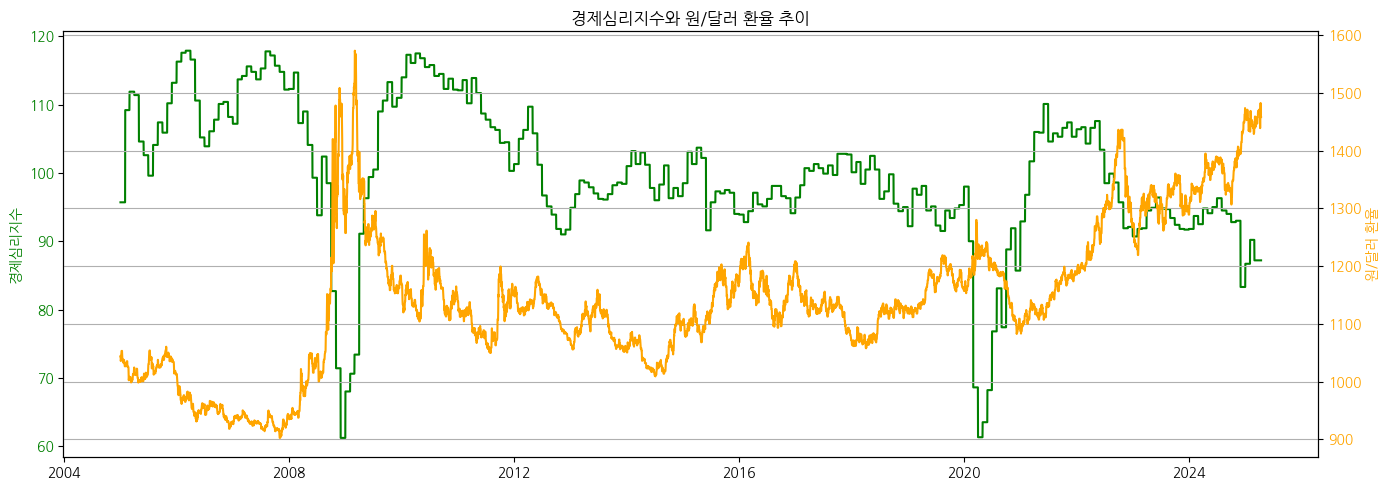

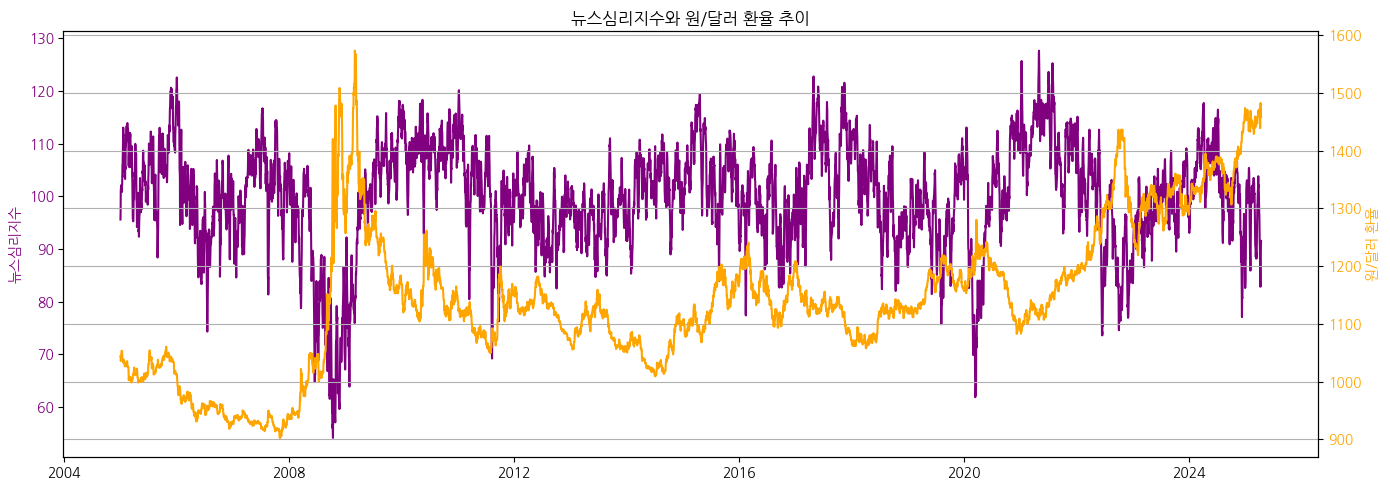

In [46]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 1. 한글 폰트 설정 (코랩 전용)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 2. 필요한 컬럼 추출
cols = ['DATE', '경제심리지수', '뉴스심리지수', '원/미국달러(매매기준율)']
df_sub = df[cols].dropna()

# 3. 시각화 - 경제심리지수 vs 환율
fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(df_sub['DATE'], df_sub['경제심리지수'], color='green', label='경제심리지수')
ax1.set_ylabel('경제심리지수', color='green')
ax1.tick_params(axis='y', labelcolor='green')

ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='orange', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('경제심리지수와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

# 4. 시각화 - 뉴스심리지수 vs 환율
fig, ax1 = plt.subplots(figsize=(14, 5))
ax1.plot(df_sub['DATE'], df_sub['뉴스심리지수'], color='purple', label='뉴스심리지수')
ax1.set_ylabel('뉴스심리지수', color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='orange', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('뉴스심리지수와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

- 경제심리지수 상승 -> 소비자와 기업의 기대 심리가 긍정적
=> 한국 경제에 대한 신뢰 증가 -> 원화 가치 상승(환율 하락)

- 뉴스심리지수 상승 -> 언론보도에 나타나는 경제 전망이 긍정적
=>외국인 투자 심리 개선 ->자본 유입 -> 원화 강세 -> 환율 하락



---
추론통계


In [47]:
# 필요한 컬럼만 선택
df_sub = df[['경제심리지수', '원/미국달러(매매기준율)']].dropna()

# 상관계수 계산
correlation = df_sub.corr()

# 결과 출력
print("상관계수:")
print(correlation)

상관계수:
                 경제심리지수  원/미국달러(매매기준율)
경제심리지수         1.000000      -0.564277
원/미국달러(매매기준율) -0.564277       1.000000


	•	경제심리지수와 원/미국달러(매매기준율) 사이의 상관계수 = -0.564
	•	→ 음의 상관관계가 있으며,
	•	→ 경제심리지수가 높을수록 환율은 낮아지는(원화 강세) 경향이 있습니다.
쉽게 말하면:

사람들이 경제를 긍정적으로 본다고 느낄수록 외국 자본이 들어오고,
원화에 대한 수요가 늘어나면서 환율이 내려가는 경향이 있다는 뜻이에요.

국내 경제심리지수가 높을수록 시장은 안정되고 외국 자본이 유입되며, 이로 인해 원화가 강세를 보이는 경향이 있음.
즉, **환율이 하락(원화 가치 상승)**하는 흐름이 나타남.

회귀계수 (기울기): -6.72775496639745
절편: 1818.0361041940878
결정계수(R²): 0.3184089056825171


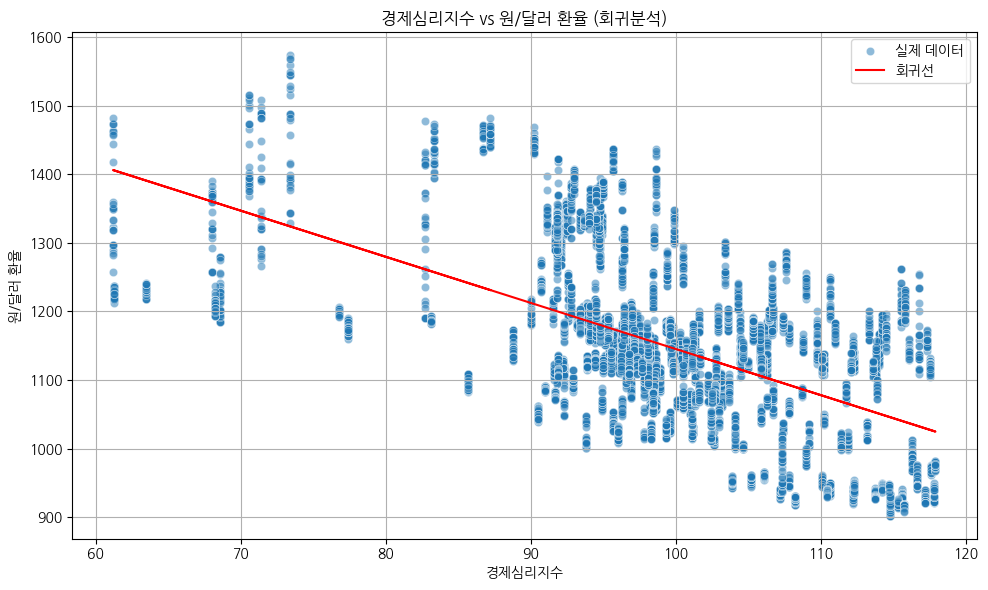

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np
import koreanize_matplotlib

# 1. 필요한 컬럼만 선택
cols = ['경제심리지수', '원/미국달러(매매기준율)']
df_reg = df[cols].dropna()

# 2. 독립변수(X), 종속변수(y)
X = df_reg[['경제심리지수']]
y = df_reg['원/미국달러(매매기준율)']

# 3. 선형 회귀 모델 학습
model = LinearRegression()
model.fit(X, y)

# 4. 회귀 결과 출력
print("회귀계수 (기울기):", model.coef_[0])
print("절편:", model.intercept_)
print("결정계수(R²):", model.score(X, y))

# 5. 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X['경제심리지수'], y=y, label='실제 데이터', alpha=0.5)
plt.plot(X, model.predict(X), color='red', label='회귀선')
plt.xlabel("경제심리지수")
plt.ylabel("원/달러 환율")
plt.title("경제심리지수 vs 원/달러 환율 (회귀분석)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

🔹 회귀계수 (기울기): -6.73
	•	경제심리지수가 1 증가할 때마다, 원/달러 환율은 약 6.73원 하락하는 경향이 있습니다.
	•	👉 즉, 경제심리가 좋아질수록 원화가 강세를 보이는 패턴입니다.

🔹 절편: 1818.04
	•	경제심리지수가 0일 때의 예측 환율입니다.
	•	단, 이 값은 해석보다는 회귀선의 위치를 결정하는 수학적 값으로 보는 게 좋아요.

🔹 결정계수 (R²): 0.318
	•	환율 변동의 약 31.8% 정도를 경제심리지수로 설명 가능합니다.
	•	👉 단일 변수로서는 나쁘지 않은 설명력이며, 다른 변수들과 함께 쓸 경우 더 강력한 모델이 가능합니다.

회귀계수 (기울기): -2.6202136953623967
절편: 1406.1077246591979
결정계수(R²): 0.04417603936646397


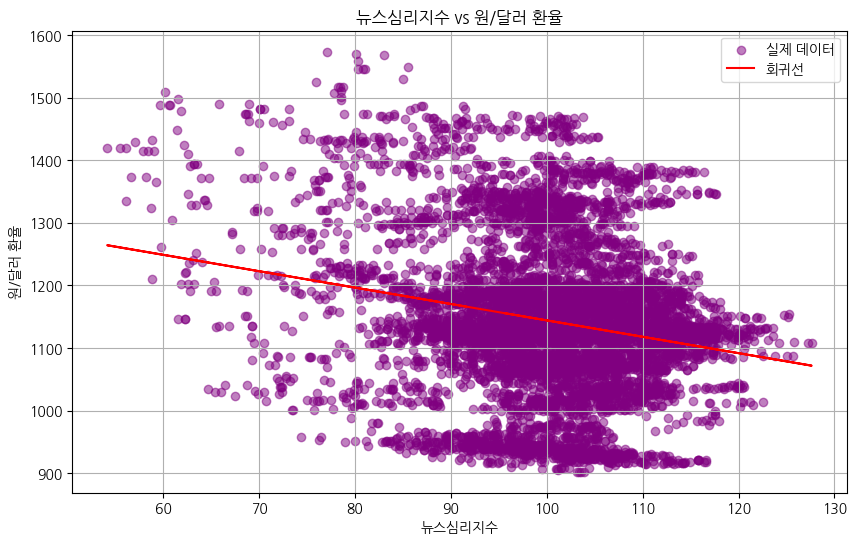

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import koreanize_matplotlib

# 데이터프레임에서 필요한 컬럼 추출 및 결측 제거
df_news = df[['뉴스심리지수', '원/미국달러(매매기준율)']].dropna()

# X, y 설정
X = df_news[['뉴스심리지수']]
y = df_news['원/미국달러(매매기준율)']

# 회귀 모델 적합
model = LinearRegression()
model.fit(X, y)

# 회귀선 예측
y_pred = model.predict(X)

# 회귀계수, 절편, 결정계수 출력
print("회귀계수 (기울기):", model.coef_[0])
print("절편:", model.intercept_)
print("결정계수(R²):", model.score(X, y))

# 시각화
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.5, label='실제 데이터', color='purple')
plt.plot(X, y_pred, color='red', label='회귀선')
plt.xlabel('뉴스심리지수')
plt.ylabel('원/달러 환율')
plt.title('뉴스심리지수 vs 원/달러 환율')
plt.legend()
plt.grid(True)
plt.show()

뉴스심리지수 vs 원/달러 환율
- 회귀계수 (기울기): -2.62
    → 뉴스심리지수가 1만큼 상승하면 환율은 평균적으로 약 2.6원 하락하는 경향이 있음
- 절편: 1406.11
→ 뉴스심리지수가 0일 경우 환율의 이론적 시작점
- 결정계수(R²): 0.0441
→ 뉴스심리지수 하나만으로는 환율의 4.4% 정도만 설명 가능하다는 의미
    (→ 설명력이 낮음, 다른 변수들도 함께 고려 필요)

  •	전체적으로 뉴스심리지수와 환율은 음의 상관관계를 가지며,
심리지수가 높아질수록 환율은 낮아지는 경향을 보입니다.

  •	하지만 결정계수(R²)가 낮기 때문에,
뉴스심리지수만으로 환율을 예측하기엔 부족하며,
**다른 거시경제 지표(예: 미국 금리, 외환보유액, 수출입지수 등)**도 함께 고려한 다변량 분석이 필요합니다.


가설3) **미국 소비자심리지수가 상승하면 원/달러 환율은 상승한다.**



In [50]:
print(df.columns.tolist())

['DATE', 'GDP(십억원)', 'GNI(십억원)', 'GDP_GROWTH(%)', 'KOSPI', '국고채(3년)(%)', '국고채(10년)(%)', '뉴스심리지수', '경제심리지수', '수출금액지수', '수입금액지수', '수출물가지수(원화기준)', '수출물가지수(계약통화기준)', '수출물가지수(달러기준)', '수입물가지수(원화기준)', '수입물가지수(계약통화기준)', '수입물가지수(달러기준)', '대외채권', '대외채무', '순대외채권', '외환보유액(천달러)', '기준금리', 'CD(91일)', '무담보콜금리(1일, 전체거래)', '경상수지(계절조정)', 'CPI', 'PPI', '원/미국달러(매매기준율)', '일본엔/달러', '달러/유로', '미국기준금리', 'NASDAQ', '위안화/달러', '미국CPI', '미국PPI', '본원 통화(달러 발행량)', '미국 소비자심리지수', '금', '은', '원유', '한국실업률', '미국실업률']


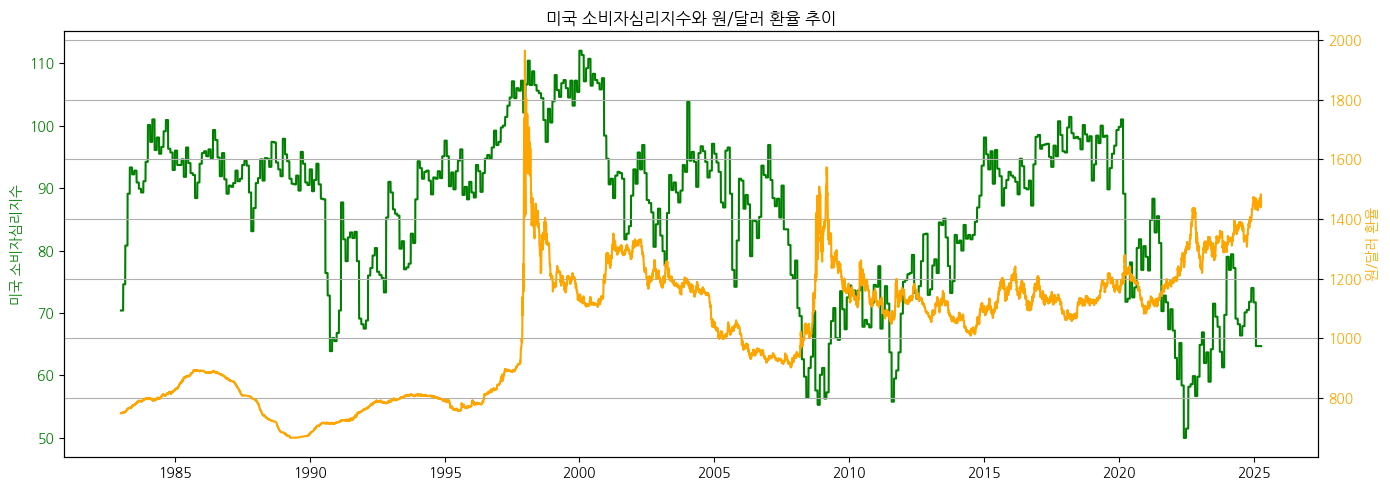

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 필요한 컬럼만 추출
df_sub = df[['DATE', '미국 소비자심리지수', '원/미국달러(매매기준율)']].dropna()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 5))

# 미국 소비자심리지수
ax1.plot(df_sub['DATE'], df_sub['미국 소비자심리지수'], color='green', label='미국 소비자심리지수')
ax1.set_ylabel('미국 소비자심리지수', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 보조축: 원/달러 환율
ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='orange', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

plt.title('미국 소비자심리지수와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

<하락>
- 2020초 코로나 => 실업자 급증, 이동 제한, 소비 위축 → 심리지수 폭락
- 2008 글로벌 금융 위기 => 리먼브라더스 파산, 실물·금융 동시 위기 → 심리 최악
- 2022 고물가 및 급격한 금리인상 => CPI가 9%에 육박, 연준의 잇따른 금리인상 → 경기침체 우려 확대
- 1990~91년 걸프전+경기둔화: => 유가 급등, 전쟁 불안 ->영향: 투자자 신뢰 하락 + 실업률 증가

<상승>
- 2021년 백신 접종 확대 및 경기 부양책 => 재정정책 + 백신 → 경기 회복 기대감 상승
- 2009년 금융위기 이후 회복 국면 => 금리 인하, 양적완화, 고용 회복 → 심리 개선
- 1996~1999년 닷컴 버블 초기 => IT기업 주가 상승 -> 부의 효과,실업률 저조 -> 안정적 성장

그래프의 등락은 대부분 다음 중 하나 이상의 사건과 관련이 있다: 팬데믹, 전쟁, 인플레이션, 금리정책 변화, 대선, 대형 금융사 파산

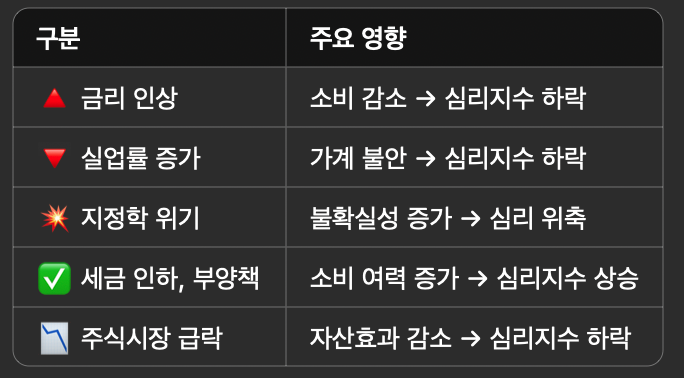

**지정학적 위기(Geopolitical Crisis)**란,
국가 간 정치·군사적 갈등, 전쟁, 제재, 테러, 국경 분쟁 등으로 인해
세계 경제나 금융 시장에 큰 불확실성을 초래하는 사건을 말합니다.

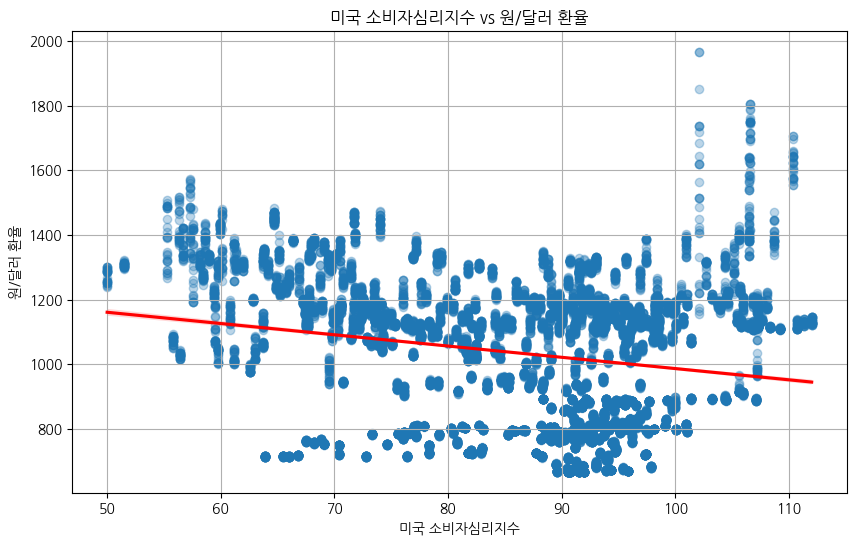

In [62]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.regplot(data=df, x='미국 소비자심리지수', y='원/미국달러(매매기준율)', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title("미국 소비자심리지수 vs 원/달러 환율")
plt.xlabel("미국 소비자심리지수")
plt.ylabel("원/달러 환율")
plt.grid(True)
plt.show()

일반적으론 소비자심리지수 상승하면 미국 경기 낙관 -> 외국인 투자 유입 가능성 상승 -> 달러강세 -> 원/달러 환율 상승 가능성 있음

하지만, 그래프 보면
- 시기에 따라 동반상승하는 구간도 있고, 반대도 있음
- 최근 몇년간은 미국심리지수 하락구간에서 환율은 상승함.

항상 정비례 관계는 아님.

추론통계

<ipython-input-63-0b31f16a440f>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly = df.set_index('DATE').resample('M')[['미국 소비자심리지수', '원/미국달러(매매기준율)']].mean().dropna()


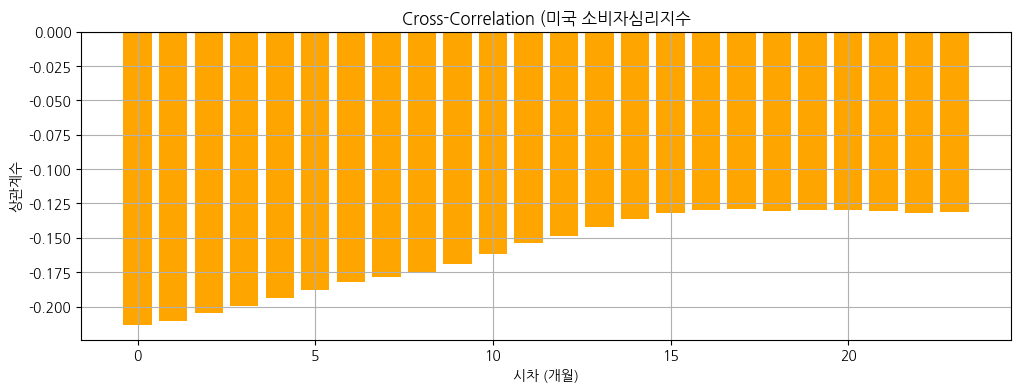

In [63]:
# 월별 환율 평균으로 집계
df['DATE'] = pd.to_datetime(df['DATE'])
monthly = df.set_index('DATE').resample('M')[['미국 소비자심리지수', '원/미국달러(매매기준율)']].mean().dropna()

# 평균 제거
x = monthly['미국 소비자심리지수'] - monthly['미국 소비자심리지수'].mean()
y = monthly['원/미국달러(매매기준율)'] - monthly['원/미국달러(매매기준율)'].mean()

from statsmodels.tsa.stattools import ccf

lags = 24
correlations = ccf(x, y)[:lags]

plt.figure(figsize=(12, 4))
plt.bar(range(lags), correlations, color='orange')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Cross-Correlation (미국 소비자심리지수')
plt.xlabel('시차 (개월)')
plt.ylabel('상관계수')
plt.grid(True)
plt.show()

시차별 교차상관

- 전체적 상관계수가 -0.2근방에서 일정하게 유지
- 특히 lag=0~3개월 사이에서 가장 음의 상관관계가 큼
- 즉, 소비자심리지수가 상승하면 환율은 하락하는 경향이 있고, 최대 1~3개월 후까지 그 영향이 유지됨

In [59]:
import pandas as pd
from statsmodels.tsa.stattools import grangercausalitytests

# 데이터 불러오기 및 정제
df_monthly = df[['DATE', '미국 소비자심리지수', '원/미국달러(매매기준율)']].copy()
df_monthly = df_monthly.set_index('DATE').resample('M').mean().dropna()

# Granger 인과성 검정 준비
df_gc = df_monthly[['원/미국달러(매매기준율)', '미국 소비자심리지수']]

# Granger Causality Test (최대 시차 12개월)
grangercausalitytests(df_gc, maxlag=12, verbose=True)

<ipython-input-59-7da846f58fbd>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.set_index('DATE').resample('M').mean().dropna()
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.2833  , p=0.5948  , df_denom=504, df_num=1
ssr based chi2 test:   chi2=0.2850  , p=0.5935  , df=1
likelihood ratio test: chi2=0.2849  , p=0.5935  , df=1
parameter F test:         F=0.2833  , p=0.5948  , df_denom=504, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.7465  , p=0.4746  , df_denom=501, df_num=2
ssr based chi2 test:   chi2=1.5078  , p=0.4705  , df=2
likelihood ratio test: chi2=1.5056  , p=0.4711  , df=2
parameter F test:         F=0.7465  , p=0.4746  , df_denom=501, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.7574  , p=0.5184  , df_denom=498, df_num=3
ssr based chi2 test:   chi2=2.3043  , p=0.5117  , df=3
likelihood ratio test: chi2=2.2990  , p=0.5127  , df=3
parameter F test:         F=0.7574  , p=0.5184  , df_denom=498, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.5551  , p=0.6954  

{np.int64(1): ({'ssr_ftest': (np.float64(0.2832895004883204),
    np.float64(0.5947877732104387),
    np.float64(504.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(0.2849757475150366),
    np.float64(0.5934583272399421),
    np.int64(1)),
   'lrtest': (np.float64(0.28489568759687245),
    np.float64(0.59351021665293),
    np.int64(1)),
   'params_ftest': (np.float64(0.2832895004884435),
    np.float64(0.594787773210366),
    np.float64(504.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(0.746455269441238),
    np.float64(0.47457039901489273),
    np.float64(501.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(1.50780984565775),
    np.float64(0.4705255945447714),
    np.int64(2)),
   'lrtest': (np.float64(1.5055677664659015),
    np.float64(0.47105336813942833),
    np.int64(2)),
   'params_ftest': (np.float64(0.7464552694409554),
    np.float64(0.4745703990150252),
    np.float64(501.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
         



---



- **미국 소비자심리지수 → 원/달러 환율**에 대한 **선행 인과관계는 유의하지 않음**.
- 거의 모든 lag(1~12)에서 **p-value가 0.05보다 큼** → 귀무가설을 기각할 수 없음 → 인과관계 없음으로 판단

가설4) 국제 유가가 상승하면 환율은 상승한다

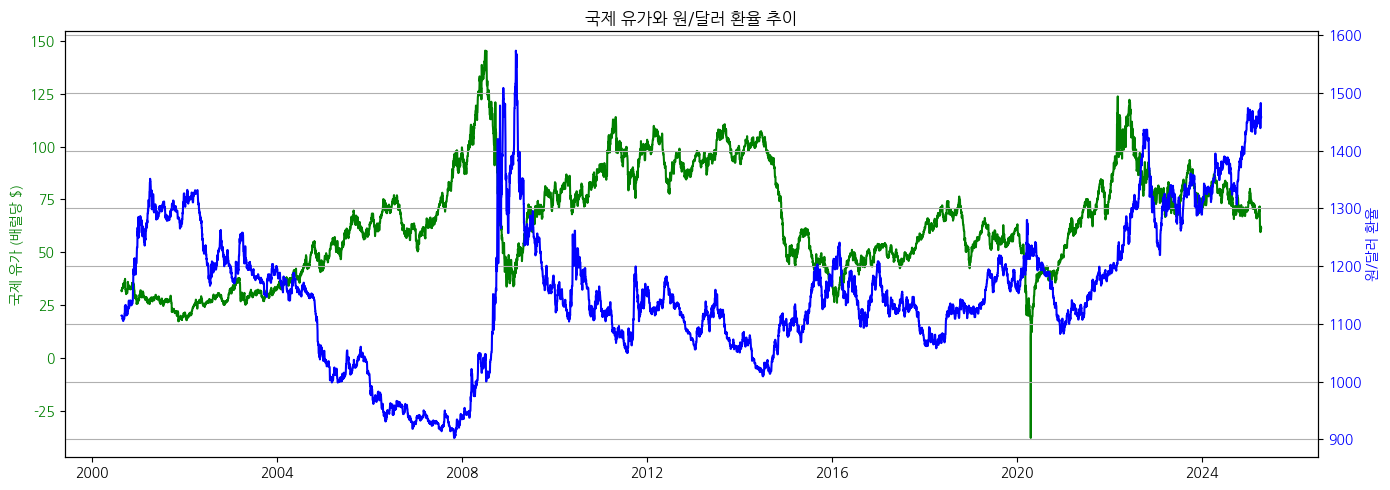

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

# 한글 폰트 설정 (필요 시)
plt.rc('font', family='NanumGothic')
plt.rcParams['axes.unicode_minus'] = False

# 필요한 컬럼 추출
df_sub = df[['DATE', '원유', '원/미국달러(매매기준율)']].dropna()

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 5))

# 왼쪽 Y축: 유가
ax1.plot(df_sub['DATE'], df_sub['원유'], color='green', label='국제 유가')
ax1.set_ylabel('국제 유가 (배럴당 $)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# 오른쪽 Y축: 환율
ax2 = ax1.twinx()
ax2.plot(df_sub['DATE'], df_sub['원/미국달러(매매기준율)'], color='blue', label='원/달러 환율')
ax2.set_ylabel('원/달러 환율', color='blue')
ax2.tick_params(axis='y', labelcolor='blue')

plt.title('국제 유가와 원/달러 환율 추이')
fig.tight_layout()
plt.grid(True)
plt.show()

- 2007~2008년: 글로벌 금융위기
	- 유가 급등 (~$140) → 수요 급증 + 중동 긴장 + 투기자본 유입.
	- 이후 폭락 → 2008년 9월 리먼 브라더스 사태 이후 글로벌 수요 붕괴.
	- 환율 급등 (~1500원) → 외국인 자금 유출, 한국 경제 불안감 반영.

- 2014~2016년: 유가 폭락기
	- 유가 $100 → $30대 급락.
	- 원인: 미국 셰일가스 생산 증가, OPEC 증산 전략.
	- 환율 소폭 상승 → 한국 수출기업 영향, 디플레이션 우려.

- 2020년: 코로나19 팬데믹
	- 유가 일시적 마이너스 (-$30 수준) 기록 (WTI 기준).
	- 원인: 수요 붕괴 + 저장시설 부족.
	- 환율 급등 (~1250원) → 글로벌 금융 불확실성, 안전자산 선호.

- 2022~2023년: 러시아-우크라이나 전쟁
	- 유가 상승 (~$130 부근) → 원자재 공급 차질, 에너지 위기.
	- 환율 상승 (~1450원) → 미국 금리 인상, 원화 약세 압력.

- 2024~2025년: 고환율 지속
	- 유가 하락세지만 환율은 고공행진 유지.
	- 이유: 미국 기준금리 고공 유지, 한국 기준금리 인하 가능성, 중국 경기 둔화, 무역수지 악화 등 복합 영향.


##요약
- 국제 유가와 환율은 종종 비슷한 방향으로 움직임.
  (유가 상승 → 수입 원가 상승 → 무역수지 악화 → 환율 상승)
- 하지만 2008년, 2020년처럼 일부 위기 국면에선 반대 방향으로도 움직임.
(유가 급락 ↔ 환율 급등 등)
- 정책금리, 지정학적 리스크, 수급, 시장심리 등 다양한 복합 요인에 의해 환율이 결정됨.

In [67]:
correlation = df_sub[['원유', '원/미국달러(매매기준율)']].corr()
print("📊 상관계수:\n", correlation)

📊 상관계수:
                      원유  원/미국달러(매매기준율)
원유             1.000000      -0.242762
원/미국달러(매매기준율) -0.242762       1.000000


국제 유가가 상승하면 환율도 상승한다.
근데 왜 상관관계가 -0.24 나올까?

1. 정제 수출 효과
- 한국은 원유를 수입해 가공(정제)해서 다시 수출하는 나라이기도 합니다.
- 유가 상승 시 오히려 정제제품 가격도 올라서 수출 확대 → 원화 강세 요인.
2.	동시에 움직이는 제3 변수 영향
	- 글로벌 경제 회복기에는 유가도 오르고 원화도 강세일 수 있음
	- 즉, “유가 상승 = 한국경제에 대한 낙관론”으로 읽히는 경우도 있음
3.	통화정책, 금리차, 지정학적 리스크 등 외생 변수
	- 단순한 이론만으로 설명하기 어려운 복합적 시장 흐름이 존재
4.	시차 영향
	- 유가가 환율에 영향을 주기까지 몇 개월 시간이 걸릴 수 있음


이론: 유가 상승 -> 환율상승(원화 약세)
실제 분석 결과 : 유가 상승 -> 환율 하락(약한 음의 상관)
해석: 정제수출 구조, 글로벌 경기 순환 등 다른 요인이 상쇄

<ipython-input-66-49c7e16a0d07>:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_monthly = df_monthly.set_index('DATE').resample('M').mean().dropna()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10141 (\N{TRIANGLE-HEADED RIGHTWARDS ARROW}) missing from font(s) NanumGothic.
  fig.canvas.print_figure(bytes_io, **kw)


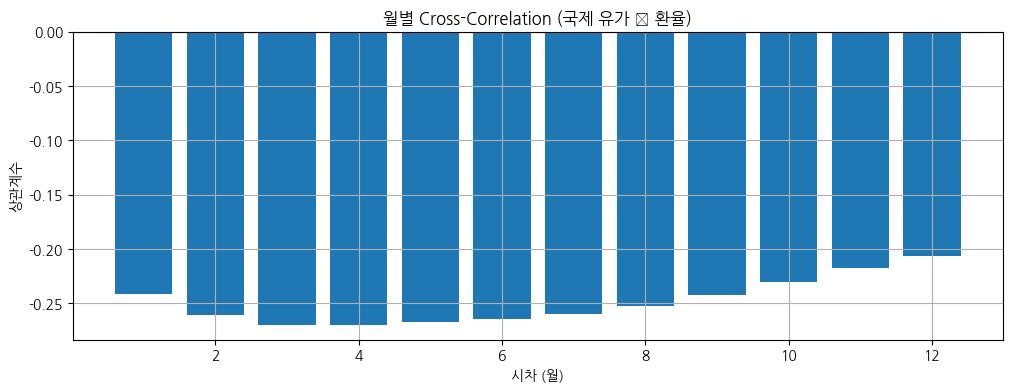

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import ccf

# 필요한 컬럼만 선택
df_monthly = df[['DATE', '원유', '원/미국달러(매매기준율)']].dropna().copy()
df_monthly['DATE'] = pd.to_datetime(df_monthly['DATE'])

# 월 단위로 리샘플링
df_monthly = df_monthly.set_index('DATE').resample('M').mean().dropna()

# 평균 제거 후 cross-correlation
x = df_monthly['원유'] - df_monthly['원유'].mean()
y = df_monthly['원/미국달러(매매기준율)'] - df_monthly['원/미국달러(매매기준율)'].mean()

lags = 12  # 12개월까지
correlations = ccf(x, y)[:lags]

# 시각화
plt.figure(figsize=(12, 4))
plt.bar(range(1, lags + 1), correlations)
plt.axhline(0, color='gray', linestyle='--')
plt.title('월별 Cross-Correlation (국제 유가 ➝ 환율)')
plt.xlabel('시차 (월)')
plt.ylabel('상관계수')
plt.grid(True)
plt.show()

- 모든 시차에서 음(-)의 상관관계가 관찰됨 (특히 시차 3~5개월에서 가장 낮음)
- 즉, 유가가 상승하면 3~5개월 뒤 환율이 하락하는 경향이 있음
- 이는 기대와는 다른 패턴일 수 있으며, 한국의 수출입 구조, 정책 반응, 자본 유출입 등 복합요인이 작용한 결과로 해석할 수 있음

In [65]:
from statsmodels.tsa.stattools import grangercausalitytests

# 월 단위로 리샘플링 (먼저 datetime 포맷 확인)
df_monthly = df[['DATE', '원유', '원/미국달러(매매기준율)']].dropna().copy()
df_monthly['DATE'] = pd.to_datetime(df_monthly['DATE'])
df_monthly = df_monthly.set_index('DATE').resample('ME').mean().dropna()
df_monthly = df_monthly[['원유', '원/미국달러(매매기준율)']].dropna()

# Granger Test: 원유 ➝ 환율, lag 1~12개월 테스트
grangercausalitytests(df_monthly, maxlag=12, verbose=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/stattools.py:1556: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=4.3239  , p=0.0385  , df_denom=293, df_num=1
ssr based chi2 test:   chi2=4.3681  , p=0.0366  , df=1
likelihood ratio test: chi2=4.3362  , p=0.0373  , df=1
parameter F test:         F=4.3239  , p=0.0385  , df_denom=293, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.3937  , p=0.0931  , df_denom=290, df_num=2
ssr based chi2 test:   chi2=4.8699  , p=0.0876  , df=2
likelihood ratio test: chi2=4.8302  , p=0.0894  , df=2
parameter F test:         F=2.3937  , p=0.0931  , df_denom=290, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.0471  , p=0.1075  , df_denom=287, df_num=3
ssr based chi2 test:   chi2=6.2910  , p=0.0983  , df=3
likelihood ratio test: chi2=6.2246  , p=0.1012  , df=3
parameter F test:         F=2.0471  , p=0.1075  , df_denom=287, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=1.8307  , p=0.1230  

{np.int64(1): ({'ssr_ftest': (np.float64(4.3238704026899715),
    np.float64(0.03845082544695901),
    np.float64(293.0),
    np.int64(1)),
   'ssr_chi2test': (np.float64(4.3681421132977185),
    np.float64(0.03661689468671239),
    np.int64(1)),
   'lrtest': (np.float64(4.336224882981696),
    np.float64(0.03730956166179662),
    np.int64(1)),
   'params_ftest': (np.float64(4.323870402690079),
    np.float64(0.0384508254469565),
    np.float64(293.0),
    1.0)},
   array([[0., 1., 0.]])]),
 np.int64(2): ({'ssr_ftest': (np.float64(2.39369583330745),
    np.float64(0.09309332819258681),
    np.float64(290.0),
    np.int64(2)),
   'ssr_chi2test': (np.float64(4.869932902246192),
    np.float64(0.08760068590338779),
    np.int64(2)),
   'lrtest': (np.float64(4.830172856704394),
    np.float64(0.08935961538368108),
    np.int64(2)),
   'params_ftest': (np.float64(2.3936958333077945),
    np.float64(0.09309332819255396),
    np.float64(290.0),
    2.0)},
   array([[0., 0., 1., 0., 0.],
     

- 시차 1개월 (lag=1) 에서만 p-value ≈ 0.038로 0.05 미만 → 유의미한 인과관계 존재!
- 나머지 시차(lag 2~12)는 모두 p > 0.05로 유의미하지 않음


결론:
국제 유가는 약 1개월 후 환율에 유의미한 영향을 줄 수 있다.
하지만 시차가 늘어날수록 이 인과관계는 통계적으로 유의하지 않음.
즉, 단기적인 환율 변동에는 영향을 줄 수 있으나 장기 인과성은 뚜렷하지 않다고 해석할 수 있다.

In [68]:
import statsmodels.api as sm

# 데이터 전처리
df_3 = df[['미국 소비자심리지수', '원/미국달러(매매기준율)']].dropna()

# 독립변수(X), 종속변수(y) 설정
X3 = sm.add_constant(df_3['미국 소비자심리지수'])
y3 = df_3['원/미국달러(매매기준율)']

# 회귀 분석
model3 = sm.OLS(y3, X3).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.044
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     712.4
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          1.78e-153
Time:                        06:46:12   Log-Likelihood:            -1.0419e+05
No. Observations:               15444   AIC:                         2.084e+05
Df Residuals:                   15442   BIC:                         2.084e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1334.7785     11.388    117.206      0.0

In [69]:
import statsmodels.api as sm

# 데이터 전처리
df_4 = df[['원유', '원/미국달러(매매기준율)']].dropna()

# 독립변수(X), 종속변수(y) 설정
X4 = sm.add_constant(df_4['원유'])
y4 = df_4['원/미국달러(매매기준율)']

# 회귀 분석
model4 = sm.OLS(y4, X4).fit()
print(model4.summary())

                            OLS Regression Results                            
Dep. Variable:          원/미국달러(매매기준율)   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                     563.5
Date:                Fri, 18 Apr 2025   Prob (F-statistic):          7.19e-121
Time:                        06:46:16   Log-Likelihood:                -55526.
No. Observations:                9000   AIC:                         1.111e+05
Df Residuals:                    8998   BIC:                         1.111e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1231.6008      3.387    363.624      0.0